

# 1. INTRODUCTION
<center>
<img src="https://images.unsplash.com/photo-1633158829585-23ba8f7c8caf?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8bG9hbnxlbnwwfHwwfHx8MA%3D%3D" width=1300 height=800 />
</center>

Text Transformations | PCA | Ensemble
@credit arunklenin

**PROBLEM STATEMENT: BANK CUSTOMER CHURN PREDICTION**

<font size="3">The dataset on bank customer churn is widely employed to forecast customer attrition within the banking sector. It encompasses details about customers who have either departed from the bank or are currently active customers.</font>

**Features**
1. Customer ID: A unique identifier for each customer
2. Surname: The customer's surname or last name
3. Credit Score: A numerical value representing the customer's credit score
4. Geography: The country where the customer resides (France, Spain or Germany)
5. Gender: The customer's gender (Male or Female)
6. Age: The customer's age.
7. Tenure: The number of years the customer has been with the bank
8. Balance: The customer's account balance
9. NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
10. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
11. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
12. EstimatedSalary: The estimated salary of the customer
13. Exited: Whether the customer has churned (1 = yes, 0 = no)

**Metric of Evalutaion:** ROC-AUC

# 2. IMPORTS

In [ ]:
# pip install imblearn

In [1]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
!pip install optuna
import optuna
!pip install cmaes
import cmaes
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
!pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

c:\Users\ghjar\anaconda3\envs\ag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


c:\Users\ghjar\anaconda3\envs\ag\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## 2.1 Data

In [2]:
global device
device = 'cpu'

train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
original=pd.read_csv("data/Churn_Modelling.csv")

train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)
original.drop(columns=['RowNumber'],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

original["original"]=1

train["original"]=0
test["original"]=0

train=pd.concat([train,original.dropna()],axis=0)
train.reset_index(inplace=True,drop=True)

target='Exited'

train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,original
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0


<font size="3">Please refer my earlier [notebook](https://www.kaggle.com/code/arunklenin/ps4e1-advanced-feature-engineering-ensemble/notebook) for EDA and Feature Engineering </font>

# 3. Text Analysis

<font size="3">surname has been considered as text</font>

In [3]:
import nltk
!pip install inflect
import inflect
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghjar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghjar\AppData\Roaming\nltk_data...


## 3.1 Clean Text

In [4]:
'''Remove punctuations and amake the text xonsistent with only alphhabet'''

def text_clean(s):
    s = re.sub(r'[^a-zA-Z]', '', s)
    s=s.lower()
    return s.strip()
train['Surname']=train['Surname'].apply(text_clean)
test['Surname']=test['Surname'].apply(text_clean)

## 3.2 Word Cloud 

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 4.7 MB/s eta 0:00:00


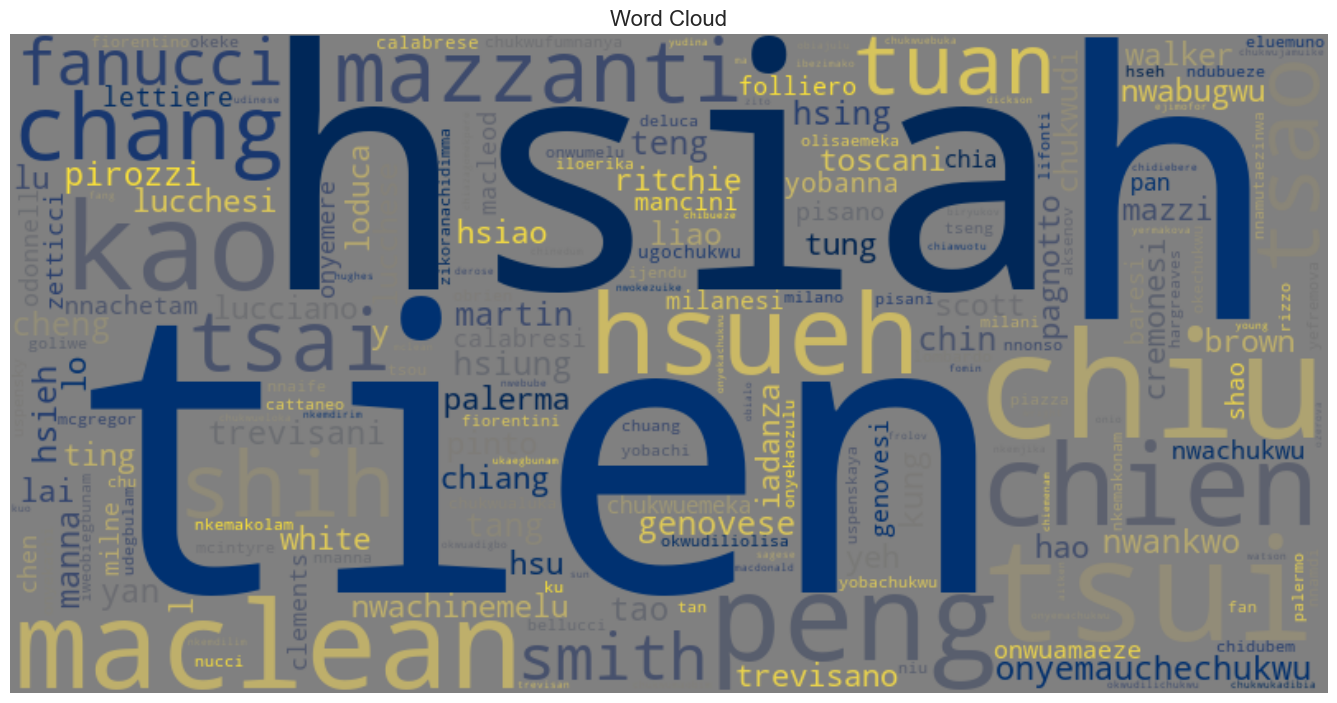

In [7]:
import pandas as pd
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(train['Surname'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='grey',
    colormap='cividis',  # Choose a colormap (e.g., 'viridis', 'cividis', 'plasma', 'inferno', etc.)
    contour_width=1,
    contour_color='steelblue',
    max_words=200,        # Maximum number of words in the cloud
    random_state=42       # For reproducibility
).generate(text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(17, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud', fontsize=16)
plt.axis('off')
plt.show()


## 3.3 TF-IDF

<font size="3">Surname has a lot of categies, so let us first handle them using TF-IDF to create 1000 vectors<font>


In [8]:
vectorizer=TfidfVectorizer(max_features=1000)
vectors_train=vectorizer.fit_transform(train['Surname'])
vectors_test=vectorizer.transform(test['Surname'])

## 3.4 Dimesionality Reduction 

<font size="3">The above technique has created a lot of columns, let us decrease the dimensionality to 10 using SVD</font>

In [9]:
svd=TruncatedSVD(10)
x_pca_train=svd.fit_transform(vectors_train)
x_pca_test=svd.transform(vectors_test)
tfidf_df_train=pd.DataFrame(x_pca_train)
tfidf_df_test=pd.DataFrame(x_pca_test)


cols=[('surname'+"_tfidf_"+str(f)) for f in tfidf_df_train.columns]
tfidf_df_train.columns=cols
tfidf_df_test.columns=cols
train=pd.concat([train,tfidf_df_train], axis="columns")
test=pd.concat([test,tfidf_df_test], axis="columns")

# 4. Feature Engineering

### Basic Functions

In [10]:
def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combines the data so that no category is missed and
    the category with least frequency can be dropped because of redundancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col+"_OHE" for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

def high_freq_ohe(train, test, extra_cols, target, n_limit=50):
    '''
    If you wish to apply one hot encoding on a feature with so many unique values, then this can be applied, 
    where it takes a maximum of n categories and drops the rest of them treating as rare categories
    '''
    train_copy=train.copy()
    test_copy=test.copy()
    ohe_cols=[]
    for col in extra_cols:
        dict1=train_copy[col].value_counts().to_dict()
        ordered=dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
        rare_keys=list([*ordered.keys()][n_limit:])
#         ext_keys=[f[0] for f in ordered.items() if f[1]<50]
        rare_key_map=dict(zip(rare_keys, np.full(len(rare_keys),9999)))
        
        train_copy[col]=train_copy[col].replace(rare_key_map)
        test_copy[col]=test_copy[col].replace(rare_key_map)
    train_copy, test_copy = OHE(train_copy, test_copy, extra_cols, target)
    drop_cols=[f for f in train_copy.columns if "9999" in f or train_copy[f].nunique()==1]
    train_copy=train_copy.drop(columns=drop_cols)
    test_copy=test_copy.drop(columns=drop_cols)
    
    return train_copy, test_copy


# 4.1 Discrete & Categorical Features

<font size="3">For each categorical/discrete variable, perform the following encoding techniques:</font>


* **Count/Frequency Encoding**: Count the number of occurrences of each category and replace the category with its count.
* **Count Labeling**: Assign a label to each category based on its count, with higher counts receiving higher labels.
* **Target-Guided Mean Encoding**: Rank the categories based on the mean of target column across each category
* **One-Hot Encoding**: Apply OHE if the unique  value is less than N (avoid creating so many features)

Please note that a particular encoding technique is not selected only if it has superior technique and the correlation with that is high

In [11]:
cat_cols = [f for f in test.columns if (train[f].dtype != 'O' and train[f].nunique()/train.shape[0]*100<=1 and train[f].nunique()>2 and 'tfidf' not in f) or (train[f].dtype == 'O') ]

'''We are also using surname in some other form as categorical encoding techniques'''

'We are also using surname in some other form as categorical encoding techniques'

In [12]:
def nearest_val(target):
    return min(common, key=lambda x: abs(x - target))

# print(train[cat_cols].nunique())
cat_cols_updated=[]
for col in cat_cols:
    if train[col].dtype=="O":
        train[col]=train[col].astype(str)+"_"+col
        test[col]=test[col].astype(str)+"_"+col
        uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
        train[col]=train[col].apply(lambda x: "uncommon_"+col if x in uncommon else x)
        cat_cols_updated.append(col)
    else:
        train[f"{col}_cat"]=train[col]
        test[f"{col}_cat"]=test[col]
        cat_cols_updated.append(f"{col}_cat")
        uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
        if uncommon:
            common=list(set(test[col].unique())& set(train[col].unique()))
            train[f"{col}_cat"]=train[col].apply(nearest_val)
            test[f"{col}_cat"]=test[col].apply(nearest_val)
            

In [13]:
def cat_encoding(train, test, target):
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Features', 'ROC AUC Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    for feature in cat_cols_updated:
#         print(feature)
#         cat_labels = train_dum.groupby([feature])[target].mean().sort_values().index
#         cat_labels2 = {k: i for i, k in enumerate(cat_labels, 0)}
#         train_copy[feature + "_target"] = train[feature].map(cat_labels2)
#         test_copy[feature + "_target"] = test[feature].map(cat_labels2)

        dic = train[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train[feature].map(dic)
        test_copy[feature + "_count"] = test[feature].map(dic)

        dic2=train[feature].value_counts().to_dict()
#         list1=np.arange(len(dic2.values()),0,-1) # Higher rank for high count
        list1=np.arange(len(dic2.values())) # Higher rank for low count
        dic3=dict(zip(list(dic2.keys()),list1))
        
        train_copy[feature+"_count_label"]=train[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test[feature].replace(dic3).astype(float)

        temp_cols = [ feature + "_count", feature + "_count_label"]#feature + "_target",

        
        if train_copy[feature].dtype=='O':
            if train_copy[feature].nunique()<=100:
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
            train_copy=train_copy.drop(columns=[feature])
            test_copy=test_copy.drop(columns=[feature])
        else:
            if train_copy[feature].nunique()<=20:
                train_copy[feature]=train_copy[feature].astype(str)+"_"+feature
                test_copy[feature]=test_copy[feature].astype(str)+"_"+feature
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
                train_copy=train_copy.drop(columns=[feature])
                test_copy=test_copy.drop(columns=[feature])
#                 temp_cols.append(feature)
            else:
                train_copy,test_copy=high_freq_ohe(train_copy,test_copy,[feature], target, n_limit=20)

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].astype(int).values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val,  y_pred))
            auc_scores.append((f, np.mean(auc)))
            
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_auc])
        print(feature)
    print(table)
    return train_copy, test_copy

train, test= cat_encoding(train, test, target)

Surname
CreditScore_cat
Geography
Gender
Age_cat
Tenure_cat
NumOfProducts_cat
+-------------------+-----------------------------+--------------------+
|      Feature      |       Encoded Features      |   ROC AUC Score    |
+-------------------+-----------------------------+--------------------+
|      Surname      |     Surname_count_label     | 0.5713013205761334 |
|  CreditScore_cat  | CreditScore_cat_count_label | 0.5383368548807314 |
|     Geography     |       Geography_count       | 0.6070082896983152 |
|       Gender      |         Gender_count        | 0.587558899636577  |
|      Age_cat      |     Age_cat_count_label     | 0.7616274801227159 |
|     Tenure_cat    |       Tenure_cat_count      | 0.5257741514333913 |
| NumOfProducts_cat |   NumOfProducts_cat_count   | 0.7445593195250544 |
+-------------------+-----------------------------+--------------------+


# 5. FEATURE SELECTION

In [14]:
final_features=[f for f in train.columns if f not in [target]]
final_features=[*set(final_features)]

sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy()
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

In [15]:
def post_processor(train, test):
    cols=train.drop(columns=[target]).columns
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)
    
    return train_cop, test_cop

                    
train_cop, test_cop=   post_processor(train_scaled, test_scaled)        

X_train = train_cop.drop(columns=[target])
y_train = train[target]

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

[]
(175032, 90) (110023, 90)


# 6. MODELING

## 6.1 Class Weights

In [16]:
classes = np.unique(y_train)  
class_to_index = {cls: idx for idx, cls in enumerate(classes)}
y_train_numeric = np.array([class_to_index[cls] for cls in y_train])

class_counts = np.bincount(y_train_numeric)

total_samples = len(y_train_numeric)

class_weights = total_samples / (len(classes) * class_counts)

class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

print("Class counts:", class_counts)
print("Total samples:", total_samples)
print("Class weights:", class_weights)
print("Class weights dictionary:", class_weights_dict)

Class counts: [138073  36959]
Total samples: 175032
Class weights: [0.63383862 2.36792121]
Class weights dictionary: {0.0: 0.6338386215987195, 1.0: 2.3679212099894476}


## 6.2 Models

In [18]:
!pip install tensorflow
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ------------ --------------------------- 0.5/1.5 MB 14.2 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 11.3 MB/s eta 0:00:01
     ----------------------------------- ---- 1.3/1.5 MB 10.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.4/300.9 MB 13.5 MB/s eta 0:00:23
   ---------------------------------------- 0.9/300.9 MB 11.2 MB/s eta 0:00:27
   ---------------------------------------- 1.3/300.9 MB 10.5 MB/s eta 0:00:29
   -------------

In [19]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
rms = tensorflow.keras.optimizers.RMSprop()
nadam=tensorflow.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
lrelu = lambda x: tensorflow.keras.activations.relu(x, alpha=0.1)

ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(16,  kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(4,  kernel_initializer='he_uniform', activation='relu'))
ann.add(Dropout(0.1))

ann.add(Dense(1,  kernel_initializer='he_uniform', activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer=sgd,metrics=['accuracy'])

In [20]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self, n_estimators=100, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.1,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
#             'class_weight':class_weights_dict,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        xgb_params2=xgb_params.copy() 
        xgb_params2['subsample']= 0.5
        xgb_params2['max_depth']=9
        xgb_params2['learning_rate']=0.045
        xgb_params2['colsample_bytree']=0.3

        xgb_params3=xgb_params.copy() 
        xgb_params3['subsample']= 0.6
        xgb_params3['max_depth']=6
        xgb_params3['learning_rate']=0.02
        xgb_params3['colsample_bytree']=0.7      

        xgb_params4=xgb_params.copy() 
        xgb_params4['subsample']= 0.5943421542786502
        xgb_params4['max_depth']=6
        xgb_params4['learning_rate']=0.109
        xgb_params4['colsample_bytree']=0.5595039093313848
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 8,
            'learning_rate': 0.02,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
#             'class_weight':class_weights_dict,
        } 
        lgb_params2 = {
            'n_estimators': self.n_estimators,
            'max_depth': 5,
            'learning_rate': 0.015,
            'subsample': 0.50,
            'colsample_bytree': 0.1,
            'reg_alpha': 0.07608657669988828,
            'reg_lambda': 0.2255036530113883,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params3=lgb_params.copy()  
        lgb_params3['subsample']=0.9
        lgb_params3['reg_lambda']=0.3461495211744402
        lgb_params3['reg_alpha']=0.3095626288582237
        lgb_params3['max_depth']=8
        lgb_params3['learning_rate']=0.007
        lgb_params3['colsample_bytree']=0.5

        lgb_params4=lgb_params2.copy()  
        lgb_params4['subsample']=0.3
        lgb_params4['reg_lambda']=0.49406951573373614
        lgb_params4['reg_alpha']=0.16269100796945424
        lgb_params4['max_depth']=9
        lgb_params4['learning_rate']=0.117
        lgb_params4['colsample_bytree']=0.3

        cb_params = {
            'iterations': self.n_estimators,
            'depth': 13,
            'learning_rate': 0.015,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.1,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 50,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bernoulli',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        cb_params2=  cb_params.copy()
        cb_params2['learning_rate']=0.01
        cb_params2['depth']=8

        cb_params3={
            'iterations': self.n_estimators,
            'random_strength': 0.5783342241486167, 
            'one_hot_max_size': 10, 
            'max_bin': 150, 
            'learning_rate': 0.177, 
            'l2_leaf_reg': 0.705662073971363, 
            'grow_policy': 'SymmetricTree', 
            'depth': 5, 
            'max_bin': 200,
            'od_wait': 65,
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_params4=  cb_params.copy()
        cb_params4['learning_rate']=0.01
        cb_params4['depth']=12
        dt_params= {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 8, 'criterion': 'gini'}
        
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
            'xgb2': xgb.XGBClassifier(**xgb_params2),
            'xgb3': xgb.XGBClassifier(**xgb_params3),
            'xgb4': xgb.XGBClassifier(**xgb_params4),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'lgb2': lgb.LGBMClassifier(**lgb_params2),
            'lgb3': lgb.LGBMClassifier(**lgb_params3),
            'lgb4': lgb.LGBMClassifier(**lgb_params4),
            'cat': CatBoostClassifier(**cb_params),
#             'cat2': CatBoostClassifier(**cb_params2),
            'cat3': CatBoostClassifier(**cb_params3),
#             'cat4': CatBoostClassifier(**cb_params4),
            "cat_sym": CatBoostClassifier(**cb_sym_params),
            "cat_loss": CatBoostClassifier(**cb_loss_params),
            'hist_gbm' : HistGradientBoostingClassifier (max_iter=300, learning_rate=0.001,  max_leaf_nodes=80,
                                                         max_depth=6,random_state=self.random_state),#class_weight=class_weights_dict, 
#             'gbdt': GradientBoostingClassifier(max_depth=6,  n_estimators=1000,random_state=self.random_state),
            'lr': LogisticRegression(),
#             'rf': RandomForestClassifier(max_depth= 9,max_features= 'auto',min_samples_split= 10,
#                                                           min_samples_leaf= 4,  n_estimators=500,random_state=self.random_state),
#             'svc': SVC(gamma="auto", probability=True),
#             'knn': KNeighborsClassifier(n_neighbors=5),
#             'mlp': MLPClassifier(random_state=self.random_state, max_iter=1000),
            'etr':ExtraTreesClassifier(min_samples_split=55, min_samples_leaf= 15, max_depth=10,
                                       n_estimators=200,random_state=self.random_state),
#             'dt' :DecisionTreeClassifier(**dt_params,random_state=self.random_state),
#             'ada': AdaBoostClassifier(random_state=self.random_state),
            'ann':ann,
                                       
        }
        return models

## 6.3 Optimize Ensemble Weights

In [21]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=5000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        auc_score = roc_auc_score(y_true, weighted_pred)
        log_loss_score=log_loss(y_true, weighted_pred)
        return auc_score#/log_loss_score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

## 6.4 Model Fit

In [25]:
kfold = True
n_splits = 1 if not kfold else 5
random_state = 2023
random_state_list = [42] # used by split_data [71]
n_estimators = 9999 # 9999
early_stopping_rounds = 300
verbose = False

splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize an array for storing test predictions
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
trained_models = {'xgb':[], 'lgb':[]}

    
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of Regressor models
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if ('cat' in name) or ("lgb" in name) or ("xgb" in name):
            if 'lgb' == name: #categorical_feature=cat_features
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)],#categorical_feature=cat_features,
                          #early_stopping_rounds=early_stopping_rounds,
                          # verbose=verbose
                          )
            elif 'cat' ==name:
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)],#cat_features=cat_features,
                          early_stopping_rounds=early_stopping_rounds, verbose=verbose)
            else:
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name in 'ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=4, epochs=5,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        
        if name in 'ann':
            test_pred = np.array(model.predict(X_test))[:, 0]
            y_val_pred = np.array(model.predict(X_val))[:, 0]
        else:
            test_pred = model.predict_proba(X_test)[:, 1]
            y_val_pred = model.predict_proba(X_val)[:, 1]

        score = roc_auc_score(y_val, y_val_pred)
#         score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))

        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] ROC AUC score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = roc_auc_score(y_val, y_val_pred)
#     score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] ------------------>  ROC AUC score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    
    gc.collect()

xgb [FOLD-0 SEED-42] ROC AUC score: 0.89314
xgb2 [FOLD-0 SEED-42] ROC AUC score: 0.89075
xgb3 [FOLD-0 SEED-42] ROC AUC score: 0.89351
xgb4 [FOLD-0 SEED-42] ROC AUC score: 0.89126
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 29538, number of negative: 110487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4793
[LightGBM] [Info] Number of data points in the train set: 140025, number of used features: 90
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[Ligh

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# Calculate the mean ROC AUC  score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble ROC AUC score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

## 6.5 Feature Importance Visualization

In [ ]:
def visualize_importance(models, feature_cols, title, head=15):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(head)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
    plt.figure(figsize=(18, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance, color= (0.4, 0.76, 0.65), errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
for name, models in trained_models.items():
    visualize_importance(models, list(X_train.columns), name)

## 6.6 Submission

In [ ]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
sub[target] =  test_predss
sub.to_csv('submission_pure.csv',index=False)
sub.head()

# 7. Generalization Ensemble

In [ ]:
cols=['Exited']

sub1=pd.read_csv("/kaggle/input/pss4e1-autogluon/autogluon.csv")
sub2=pd.read_csv("/kaggle/input/automl-autogluon/submission.csv")
sub3=pd.read_csv("/kaggle/input/ps4e1-catboost/submission.csv")
sub4=pd.read_csv("/kaggle/input/ps4e1-advanced-feature-engineering-ensemble/submission.csv")
sub5=pd.read_csv("/kaggle/input/playgrounds4e01-baseline-v2/Submission_V1.csv")

sub_list=[sub, sub1,sub2,sub3,sub4,sub5]
weights=[1,1,1,1,1,1]
weighted_list = [item for sublist, weight in zip(sub_list, weights) for item in [sublist] * weight]


def ensemble_mean(sub_list, mean="AM"):
    
    sub_out=sub_list[0].copy()
    if mean=="AM":
        for col in cols:
            sub_out[col]=sum(df[col] for df in sub_list)/len(sub_list)
    elif mean=="GM":
        for df in sub_list[1:]:

            for col in cols:
                sub_out[col]*=df[col]
        for col in cols:
            sub_out[col]=(sub_out[col])**(1/len(sub_list))
    elif mean=="HM":
        for col in cols:
            sub_out[col]=len(sub_list)/sum(1/df[col] for df in sub_list)
    
    return sub_out

sub_ensemble=ensemble_mean(weighted_list,mean="AM")
sub_ensemble.to_csv('submission.csv',index=False)
sub_ensemble.head()